<a href="https://colab.research.google.com/github/JozefV99/Master-Thesis/blob/main/MEDIUM_COMPLEXITY_ANNOTATIONS_GENERATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALL LIBRARIES FOR VISUALIZATION:**

In [ ]:
!pip install -q \
supervision==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 664.0 kB/s eta 0:00:00


# **PREPARE IMAGES:**

In [ ]:
# IMPORT:

import os
import shutil
import zipfile
import random
from collections import defaultdict
from google.colab import drive
from PIL import Image

# Mount Google Drive
drive.mount('/content/gdrive')

def extract_and_organize(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                # Extract the zip file into a temporary directory
                temp_dir = os.path.join(target_folder, "temp")
                os.makedirs(temp_dir, exist_ok=True)
                zip_file.extractall(temp_dir)
                print(f"Extracted {zip_filename} into {temp_dir}")

                # Check the actual directory structure within the temp directory
                intermediate_dir = temp_dir
                possible_dirs = [intermediate_dir] + [os.path.join(intermediate_dir, d) for d in os.listdir(intermediate_dir) if os.path.isdir(os.path.join(intermediate_dir, d))]
                for dir_path in possible_dirs:
                    if os.path.exists(dir_path):
                        for file_name in os.listdir(dir_path):
                            full_file_path = os.path.join(dir_path, file_name)
                            if os.path.isfile(full_file_path):
                                # Resize the image
                                label = file_name[:8]  # Extract label (first 8 characters)
                                label_dir = os.path.join(target_folder, label)
                                os.makedirs(label_dir, exist_ok=True)
                                shutil.move(full_file_path, os.path.join(label_dir, file_name))
                # Clean up the temporary directory
                shutil.rmtree(temp_dir)
                print(f"Cleaned up {temp_dir}")

def stratified_split(base_folder, train_target, val_target, train_ratio=0.8):
    # Create directories for training and validation sets
    os.makedirs(train_target, exist_ok=True)
    os.makedirs(val_target, exist_ok=True)

    label_dirs = [d for d in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, d))]
    for label_dir in label_dirs:
        files = os.listdir(os.path.join(base_folder, label_dir))
        random.shuffle(files)  # Shuffle to ensure random distribution

        # Calculate split index
        split_idx = int(len(files) * train_ratio)
        train_files = files[:split_idx]
        val_files = files[split_idx:]

        # Move files to their respective directories
        for file in train_files:
            shutil.move(os.path.join(base_folder, label_dir, file), os.path.join(train_target, file))
        for file in val_files:
            shutil.move(os.path.join(base_folder, label_dir, file), os.path.join(val_target, file))
        print(f"Moved {len(train_files)} files to {train_target} and {len(val_files)} files to {val_target} for label {label_dir}")

# Specify the source and target directories
train_val_source = "/content/gdrive/My Drive/Colab Notebooks/Data/MEDIUM COMPLEXITY"
base_target = '/content/Images'
train_target = '/content/Images/train'
val_target = '/content/Images/val'

# Extract and organize files from ZIP archives
extract_and_organize(train_val_source, base_target)

# Perform a stratified split
stratified_split(base_target, train_target, val_target)

# Print final directory structure for verification
for root, dirs, files in os.walk(train_target, topdown=True):
    for dir_name in dirs:
        print(f"Directory: {os.path.join(root, dir_name)}")
        if os.listdir(os.path.join(root, dir_name)):
            print(os.listdir(os.path.join(root, dir_name)))

# Delete folders
# Delete previous directories along with any files
folder_paths = [
    "/content/Images/D1098590",
    "/content/Images/D1100844",
    "/content/Images/D1612695",
    "/content/Images/D1899542",
    "/content/Images/D4332268"
]

# Loop through each folder and delete it
for folder in folder_paths:
    shutil.rmtree(folder)

Mounted at /content/gdrive
Extracted D1098590.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D1100844.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D1612695.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D1899542.zip into /content/Images/temp
Cleaned up /content/Images/temp
Extracted D4332268.zip into /content/Images/temp
Cleaned up /content/Images/temp
Moved 0 files to /content/Images/train and 0 files to /content/Images/val for label train
Moved 8000 files to /content/Images/train and 2000 files to /content/Images/val for label D1612695
Moved 1600 files to /content/Images/train and 400 files to /content/Images/val for label val
Moved 8000 files to /content/Images/train and 2000 files to /content/Images/val for label D1899542
Moved 8000 files to /content/Images/train and 2000 files to /content/Images/val for label D4332268
Moved 8000 files to /content/Images/train and 2000 files to /content/Images/val for labe

In [ ]:
import os
import shutil

def merge_folders(src_folder1, src_folder2, dest_folder):
    # Ensure the destination folder exists, if not, create it
    os.makedirs(dest_folder, exist_ok=True)

    # Function to copy contents from source to destination
    def copy_contents(src_folder, dest_folder):
        for item in os.listdir(src_folder):
            src_path = os.path.join(src_folder, item)
            dest_path = os.path.join(dest_folder, item)

            if os.path.isdir(src_path):
                # If it's a directory, recursively copy its contents
                shutil.copytree(src_path, dest_path, dirs_exist_ok=True)
            else:
                # If it's a file, copy it directly
                shutil.copy2(src_path, dest_path)

    # Copy contents from both source folders to the destination folder
    copy_contents(src_folder1, dest_folder)
    print(f"Copied all files from {src_folder1} to {dest_folder}")

    copy_contents(src_folder2, dest_folder)
    print(f"Copied all files from {src_folder2} to {dest_folder}")

# Example usage
src_folder1 = '/content/Images/train'
src_folder2 = '/content/Images/val'
dest_folder = '/content/Images/all_images'

merge_folders(src_folder1, src_folder2, dest_folder)

Copied all files from /content/Images/train to /content/Images/all_images
Copied all files from /content/Images/val to /content/Images/all_images


# **PERFORM TRESHOLDING TO GET BOUNDING BOX COORDINATES:**

In [ ]:
import cv2
import numpy as np
import os

def create_annotations_via_thresholding(image_directory, output_directory, class_mapping):
    os.makedirs(output_directory, exist_ok=True)

    for image_name in os.listdir(image_directory):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            class_label = image_name[:8]  # Extract the class label from the filename
            class_id = class_mapping.get(class_label, -1)  # Default to -1 if class label not found

            if class_id == -1:
                print(f"Warning: No class ID found for {image_name}, skipping...")
                continue

            image_path = os.path.join(image_directory, image_name)
            image = cv2.imread(image_path)
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply a threshold to isolate non-white areas (objects)
            _, thresholded = cv2.threshold(image_gray, 240, 255, cv2.THRESH_BINARY_INV)

            # Optionally, apply morphological operations to remove small noise
            kernel = np.ones((5,5),np.uint8)
            thresholded = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

            # Find contours (objects) from thresholded image
            contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Select the largest contour as the primary object
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)
                x, y, w, h = cv2.boundingRect(largest_contour)

                # Convert to YOLO format
                x_center = (x + w / 2) / image.shape[1]
                y_center = (y + h / 2) / image.shape[0]
                width = w / image.shape[1]
                height = h / image.shape[0]

                # File for storing annotations
                base_name = os.path.splitext(image_name)[0]
                annotation_file = os.path.join(output_directory, f"{base_name}.txt")

                with open(annotation_file, 'w') as file:
                    file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
                print(f"Annotations created for {image_name}")

# Define directories and class mapping
image_directory = '/content/Images/all_images'
annotations_directory = '/content/Images/Annotations'
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
    # Add additional classes as needed
}

create_annotations_via_thresholding(image_directory, annotations_directory, class_mapping)

Streaming output truncated to the last 5000 lines.
Annotations created for D1612695_3003.png
Annotations created for D1098590_7118.png
Annotations created for D1612695_5936.png
Annotations created for D1098590_8983.png
Annotations created for D1100844_9266.png
Annotations created for D1098590_2325.png
Annotations created for D4332268_2200.png
Annotations created for D1612695_2746.png
Annotations created for D4332268_8888.png
Annotations created for D1899542_5758.png
Annotations created for D1100844_3890.png
Annotations created for D4332268_163.png
Annotations created for D1098590_4156.png
Annotations created for D1098590_238.png
Annotations created for D1100844_78.png
Annotations created for D1899542_2915.png
Annotations created for D1098590_5143.png
Annotations created for D1100844_7320.png
Annotations created for D1100844_5358.png
Annotations created for D1899542_1282.png
Annotations created for D1098590_8021.png
Annotations created for D1098590_9279.png
Annotations created for D1899

# **CREATE YAML FILE FOR VISUAL INSPECTION:**

In [ ]:
def create_data_yaml(yaml_path, train_dir, val_dir, num_classes, class_names):
    data = {
        'train': train_dir,
        'val': val_dir,
        'nc': num_classes,
        'names': class_names
    }

    with open(yaml_path, 'w') as yaml_file:
        import yaml
        yaml.dump(data, yaml_file, default_flow_style=False)

# Define your settings
yaml_path = '/content/Images/data.yaml'
train_dir = '/content/Images/train'  # Adjust as necessary if you have a separate training directory
val_dir = '/content/Images/val'  # Adjust as necessary
num_classes = 5
class_names = ['D1098590', 'D1100844', 'D1612695', 'D1899542', 'D4332268']  # Adjust names as per your classes

create_data_yaml(yaml_path, train_dir, val_dir, num_classes, class_names)

In [ ]:
images_directory = '/content/Images/all_images'
annotations_directory = '/content/Images/Annotations'
yaml_path = '/content/Images/data.yaml'

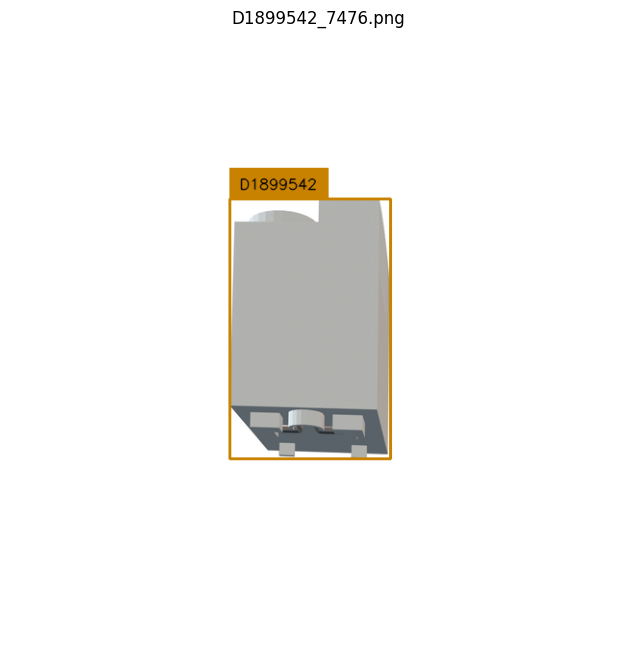

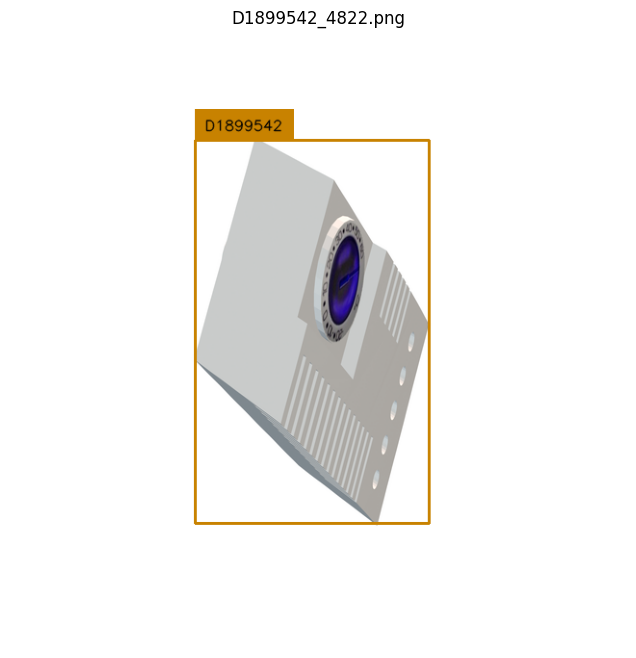

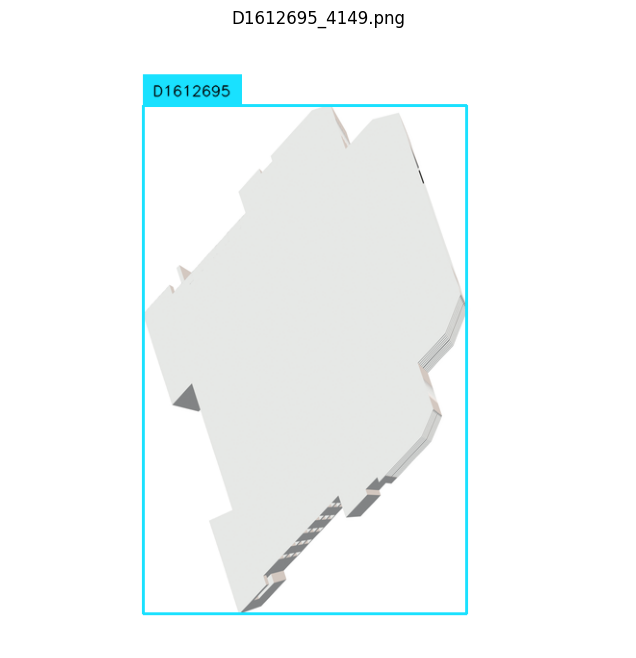

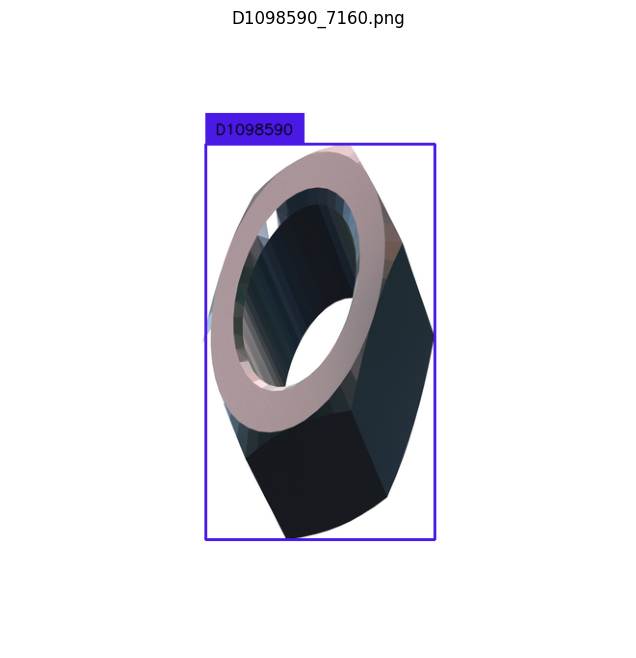

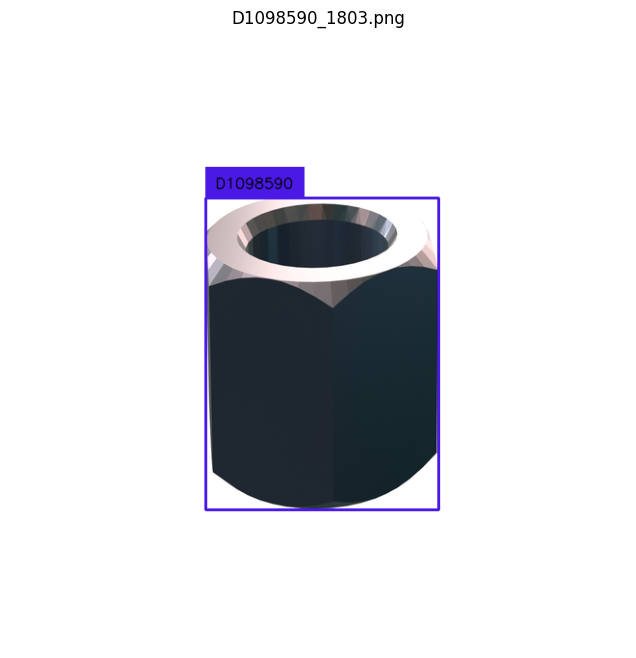

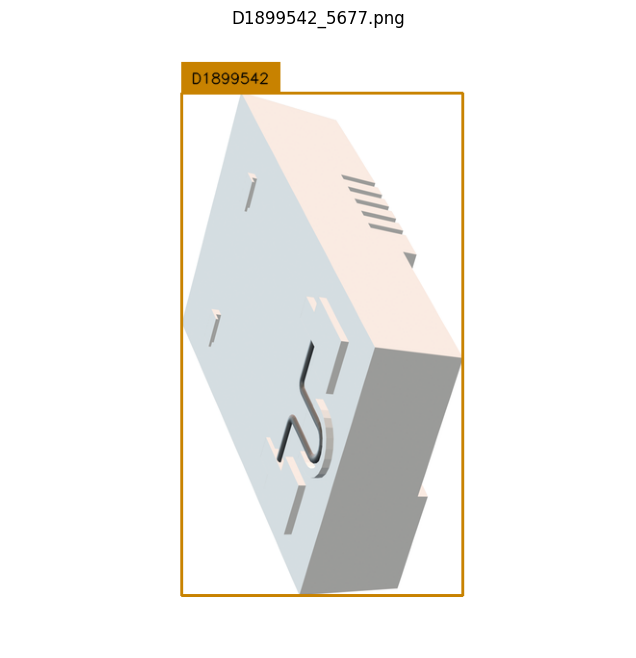

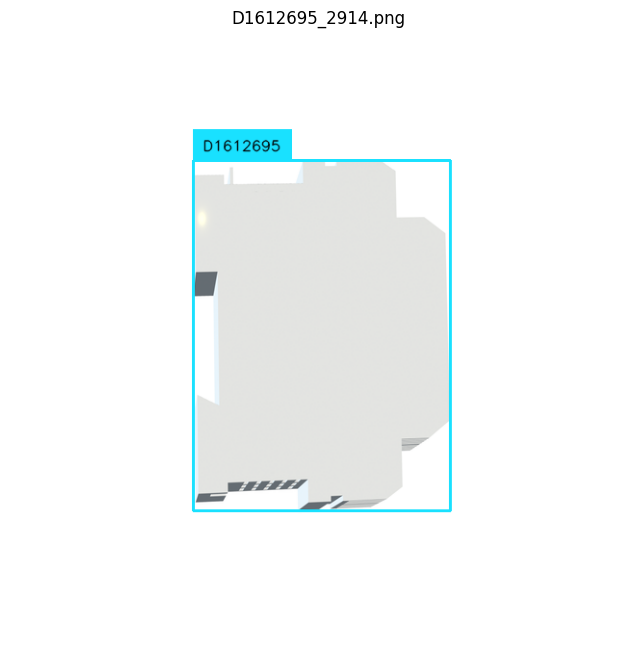

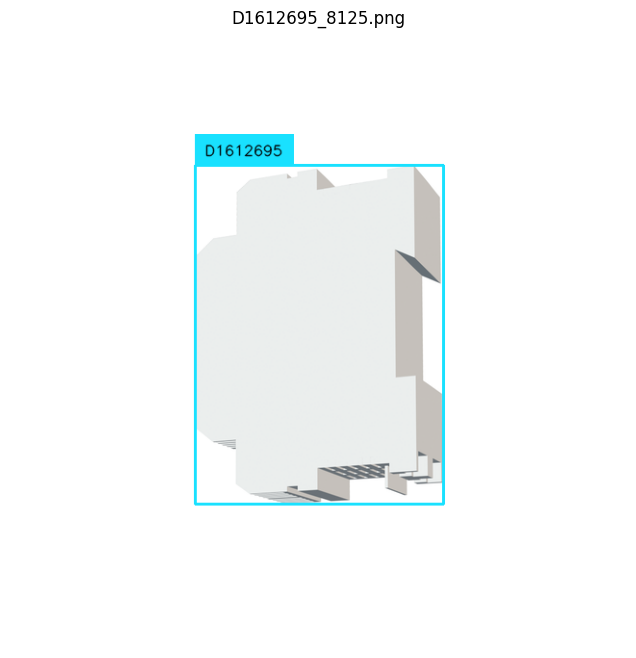

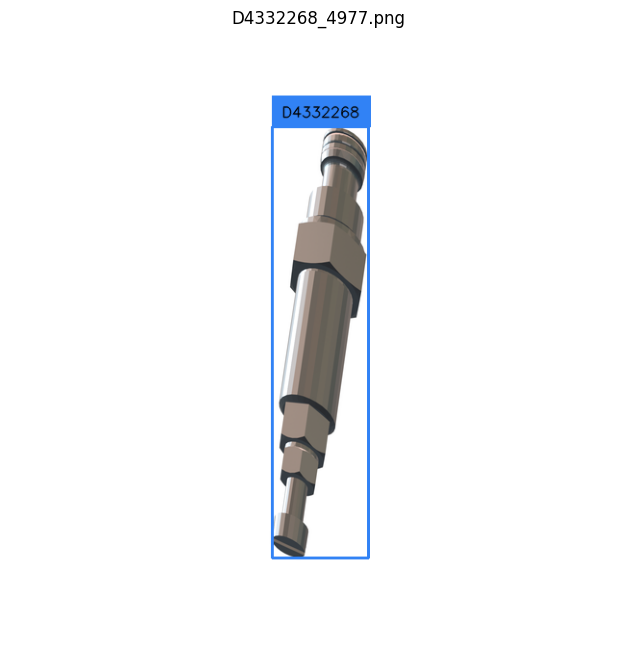

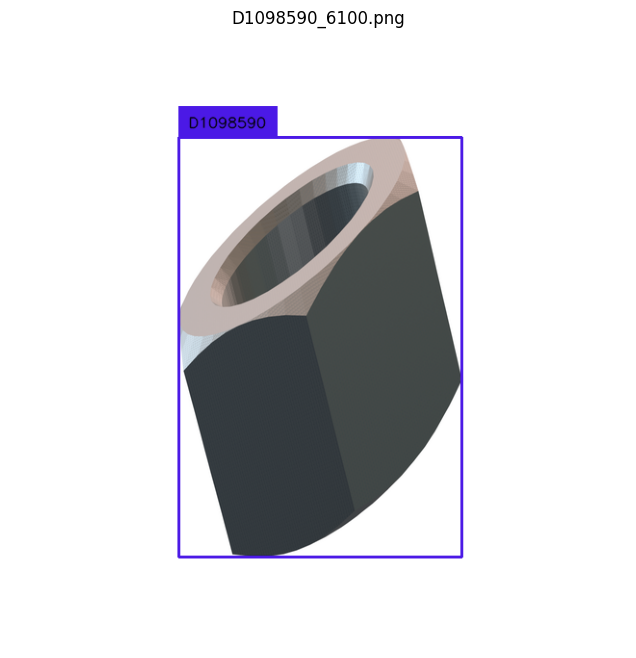

In [ ]:
import supervision as sv
import matplotlib.pyplot as plt

def load_and_visualize(images_directory, annotations_directory):
    dataset = sv.DetectionDataset.from_yolo(
        images_directory_path=images_directory,
        annotations_directory_path=annotations_directory,
        data_yaml_path=yaml_path
    )

    box_annotator = sv.BoxAnnotator()

    for i, (image_name, image) in enumerate(dataset.images.items()):
        if i >= 10:  # Limit to 10 images for display
            break
        annotations = dataset.annotations[image_name]
        labels = [dataset.classes[class_id] for class_id in annotations.class_id]

        annotated_image = box_annotator.annotate(
            scene=image.copy(),
            detections=annotations,
            labels=labels
        )

        plt.figure(figsize=(12, 8))
        plt.imshow(annotated_image)
        plt.title(image_name)
        plt.axis('off')
        plt.show()

load_and_visualize(images_directory, annotations_directory)

# **DOWNLOAD ANNOTATIONS:**

In [ ]:
# ZIP AND DOWNLOAD:

import os
import zipfile
from google.colab import files

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(folder_path, '..')))

folder_path = "/content/Images/Annotations"  # Change this to your folder path
output_zip_path = '/content/MEDIUM_COMPLEXITY_Annotations.zip'  # Output zip file name and path

zip_folder(folder_path, output_zip_path)
files.download(output_zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>